In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


## Data Preprocessing

In [39]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalizing input data to be between 0 and 1 (easier for network to learn)

In [40]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

One image in the x training set

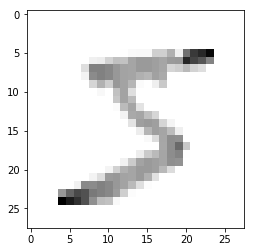

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [41]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

## Building the model (sequential)

In [42]:
model = tf.keras.models.Sequential()

# currently, the images are 28x28, so we ought to flatten them
model.add(tf.keras.layers.Flatten())

# 2 hidden layers
# Dense layers with 128 units/nuerons 
# activation to fire the nueron (relu is commonly used)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer 
# activiation is softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# optimizer (adam, stochastic gradient descent)
# loss (categorical crossentropy, binary)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2614 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1068 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0734 - acc: 0.9768


## Calculate Validation Loss & Accuracy

In [44]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0933 - acc: 0.9713
0.09329486961690708 0.9713


## Save and Load Model

In [45]:
model.save('epic_num_reader.model')

In [46]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

## Using the Model to Predict

In [47]:
predictions = new_model.predict(x_test)


These are one hot arrays (probability distributions)

In [48]:
print(predictions)

[[3.08567705e-09 5.23964339e-08 1.41097562e-05 ... 9.99967456e-01
  1.47295918e-08 1.23860175e-08]
 [1.06384618e-07 1.78088364e-03 9.98000205e-01 ... 1.08965574e-08
  1.91835588e-05 1.83908791e-10]
 [3.75998077e-08 9.99863505e-01 2.92256136e-05 ... 6.34122407e-05
  1.85930585e-05 5.27437408e-07]
 ...
 [9.12615050e-09 1.03040622e-06 1.63446785e-07 ... 2.42453498e-05
  5.45291550e-05 1.31412817e-04]
 [2.84605562e-07 4.33182059e-08 6.17329121e-08 ... 5.07263167e-07
  5.28029690e-04 1.77604029e-08]
 [7.73065452e-08 2.85023170e-08 2.42772984e-07 ... 1.89235028e-09
  2.17459597e-08 3.69628772e-10]]


In [49]:
import numpy as np

print(np.argmax(predictions[0]))

7


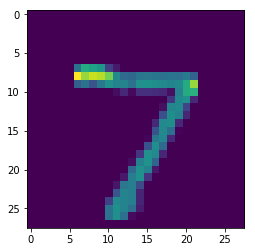

In [50]:
plt.imshow(x_test[0])
plt.show()

### Messing around with building the model

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Using sigmoid as activation function for layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5175 - acc: 0.8599 - val_loss: 0.2613 - val_acc: 0.9249
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2213 - acc: 0.9349 - val_loss: 0.1870 - val_acc: 0.9431
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1627 - acc: 0.9513 - val_loss: 0.1504 - val_acc: 0.9542
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1270 - acc: 0.9617 - val_loss: 0.1249 - val_acc: 0.9613
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1019 - acc: 0.9694 - val_loss: 0.1106 - val_acc: 0.9653
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0837 - acc: 0.9748 - val_loss: 0.1058 - val_acc: 0.9673
Epoch 7/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0689 - acc: 0.9796 - val_loss: 0.

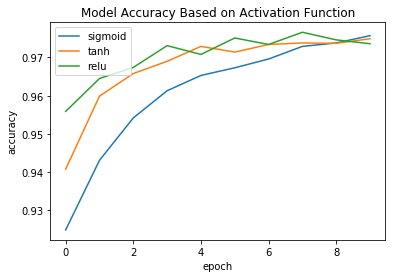

In [16]:
for activation in [tf.nn.sigmoid, tf.nn.tanh, tf.nn.relu]:

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=activation))
    model.add(tf.keras.layers.Dense(128, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    
    plt.plot(history.history['val_acc'])
    
plt.title('Model Accuracy Based on Activation Function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['sigmoid', 'tanh', 'relu'], loc='upper left')